# About
* used python version 3.10.6
* requirements: [Requirements file](./requirements.txt)
* plots are saved in folder [./Plots/](./Plots/) under the respective day of plotting them
* functions can be found in the following python files: [get_information.py](./get_information.py) (saving information from OSCAR API and xml files into data frame), [create_plots.py](./create_plots.py) (plotting functions), [create_animation.py](./create_animation.py) (create animation)
* this [execution file](./execution_file.ipynb) executes all the plotting functions to generate new plots
* some functions may take a few minutes to execute

### Other files and folders
* [Sandbox](./OSCAR_analysis/sandbox): testing new stuff
* [WMDR dictionaries](./OSCAR_analysis/WMDR_dictionaries): variable dictionary to translate from WMDR notation to WMDR name (has to be updated when WMDR is updated)
* [Stations json](./stations.json): json filled with basic information on stations from OSCAR API (is overwritten when running this script)
* [Files](./OSCAR_analysis/Files): txt files from stations (used for finding information - are overwritten when running this script)

___

## Import functions from other python scripts

In [3]:
# plotting functions
from create_plots import *
# function creating the animation
from create_animation import *
# some other functions
from get_information import get_WIGOS_ID_country, save_basic_info_to_json

In [4]:
import os

***

## Overview: Analysis over all stations registered within a country

1. create a .json file (function: save_basic_info_to_json) with the basic information needed -> [stations.json](./stations.json)
2. create various plots and animations based on these information (save them in the following folder: [./Plots/](./Plots/) under the respective date of plotting them)

* The maps are adapted to Kenya. If another country is of interest, the map extent must be adjusted within the plotting functions. (create_plots.py)

In [5]:
## create json file with basic information on stations ##
save_basic_info_to_json(country="KEN")

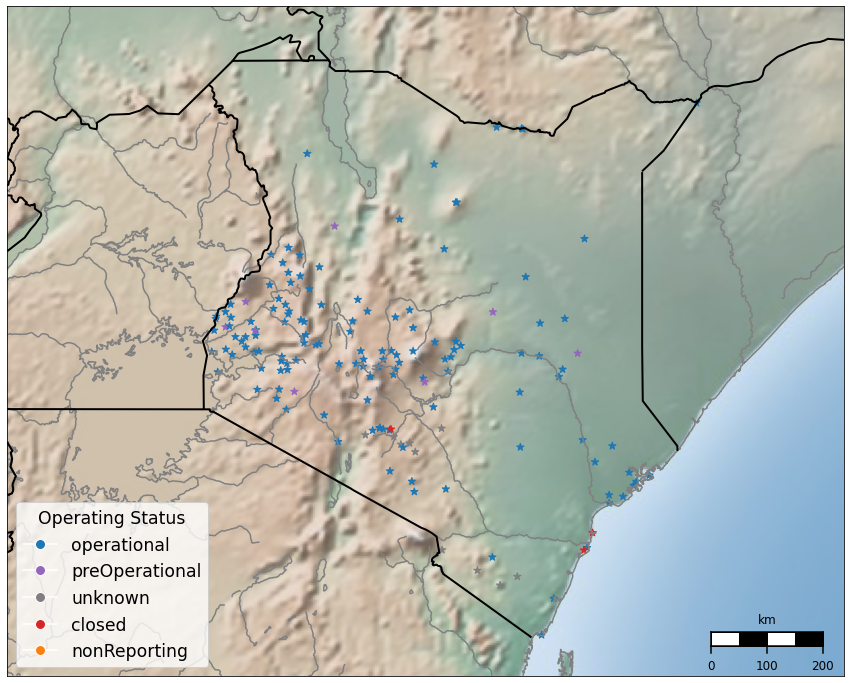

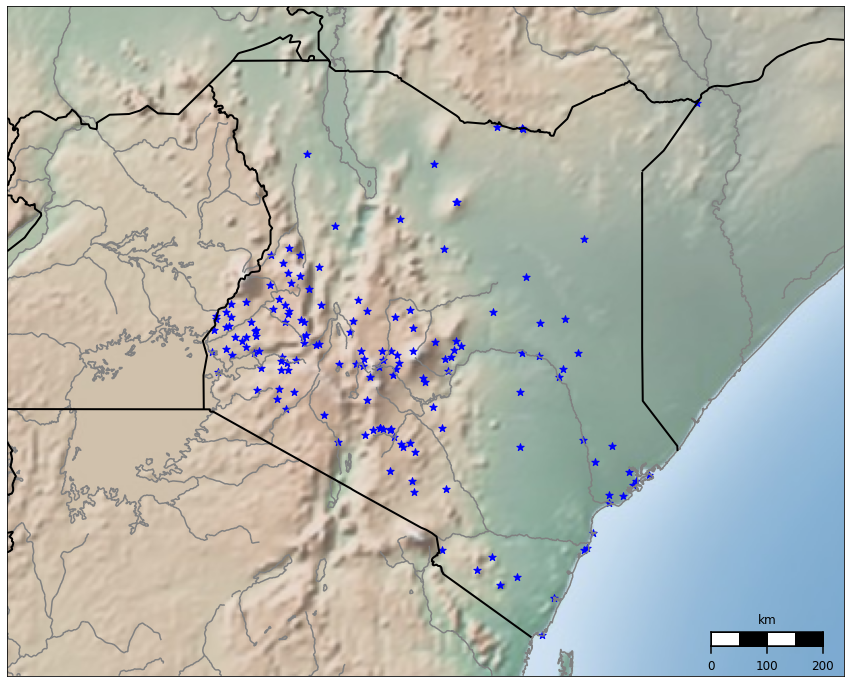

In [6]:
## Spatial overview of all stations of a country ##

json_file = os.getcwd()+'/stations.json'

# including today's reporting status
plot_overview_map(json_file=json_file, reporting=True)
# without today's reporting status
plot_overview_map(json_file=json_file, reporting=False)

/home/sdanioth/.local/lib/python3.10/site-packages/pyproj/transformer.py:812: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return self._transformer._transform_point(


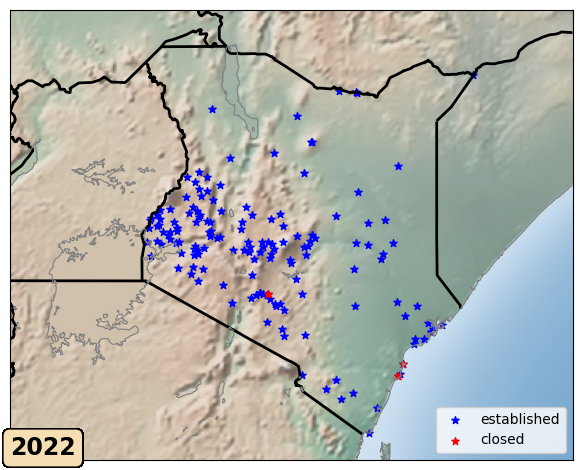

/home/sdanioth/.local/lib/python3.10/site-packages/pyproj/transformer.py:812: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return self._transformer._transform_point(


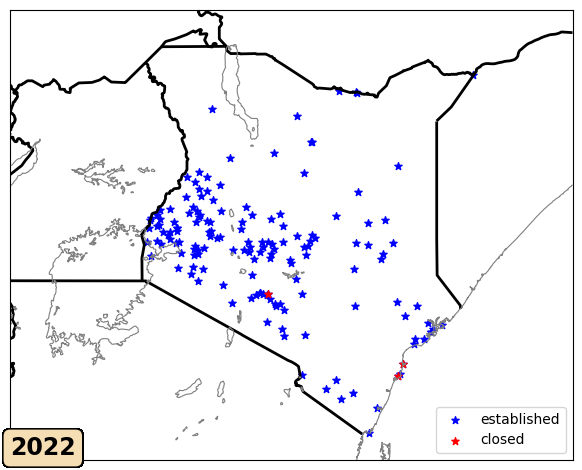

In [7]:
## Animation: evolution over time ##
# stations are added to the map in the year of their establishment and turn red in their closing year

json_file = os.getcwd()+'/stations.json'

# relief as map background
animation_establishment(json_file, background = True)
# white map as background
animation_establishment(json_file, background = False)

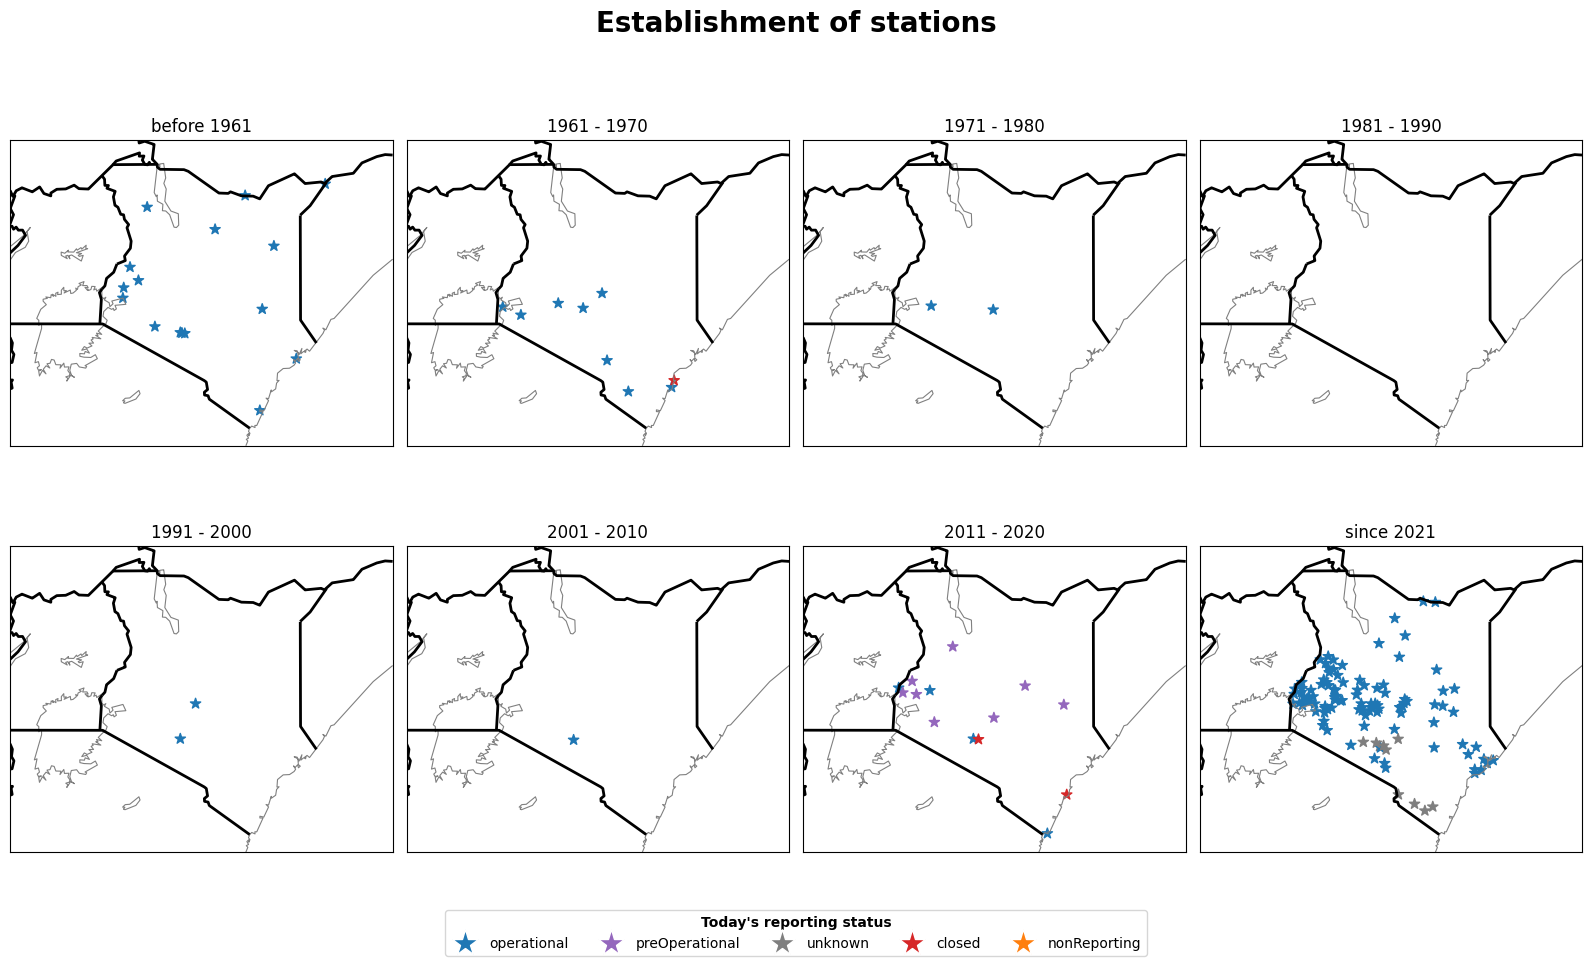

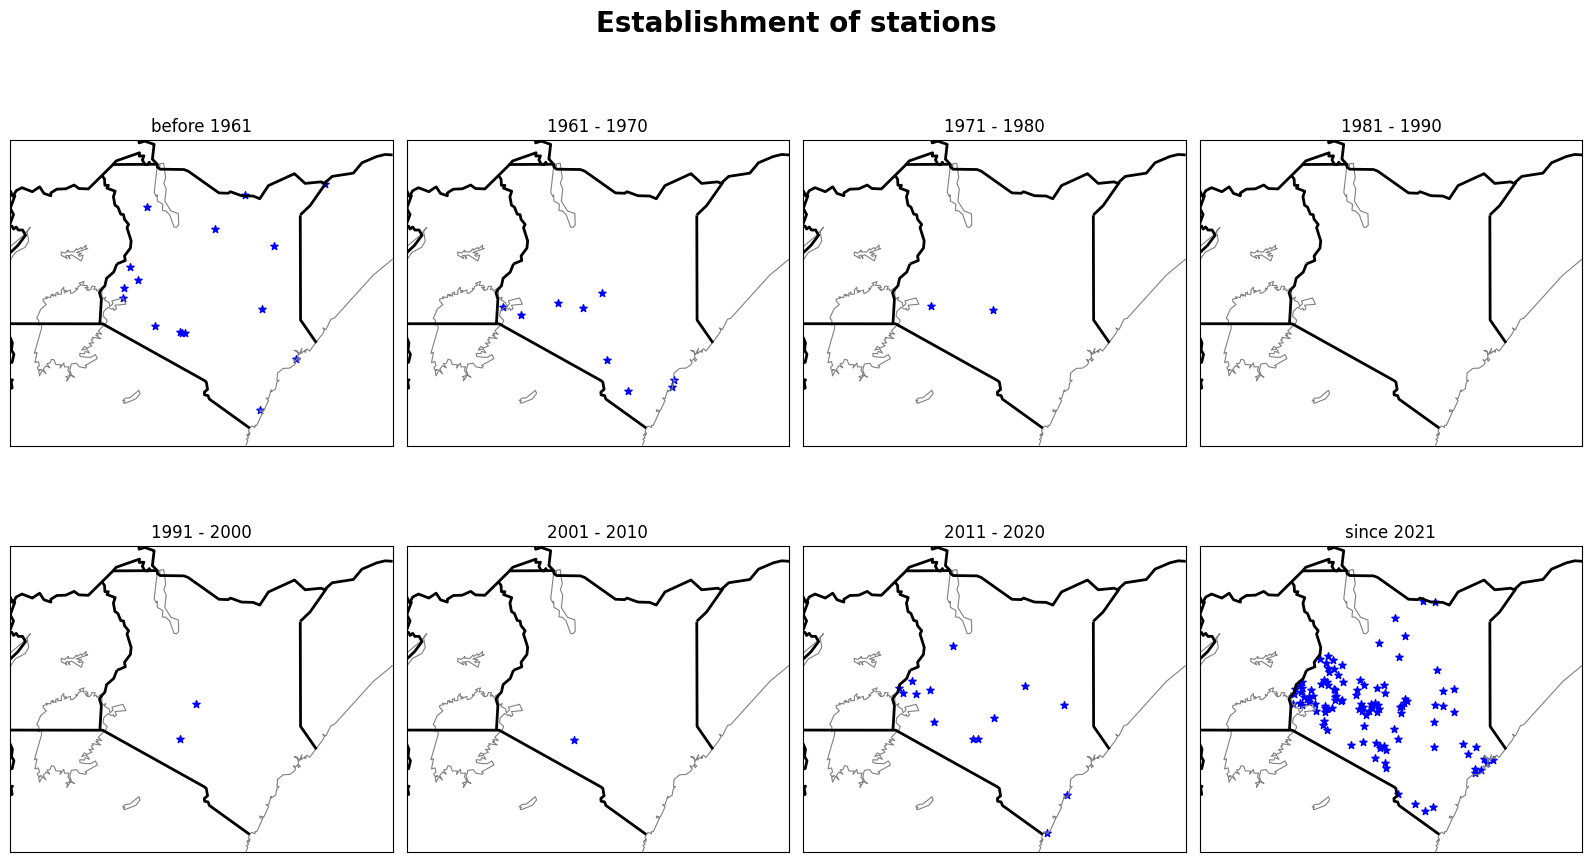

In [8]:
## Maps (one for every decade) with all catalogued stations established within that decade ##
# color of dots according to today's reporting status

json_file = os.getcwd()+'/stations.json'
plt.style.use('default')

# including today's reporting status
plot_maps_establishment_decade(json_file, reporting=True)
# without today's reporting status
plot_maps_establishment_decade(json_file, reporting=False)

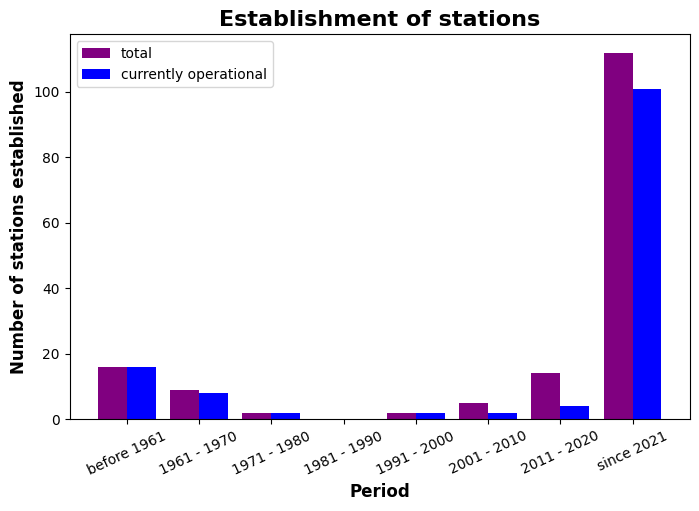

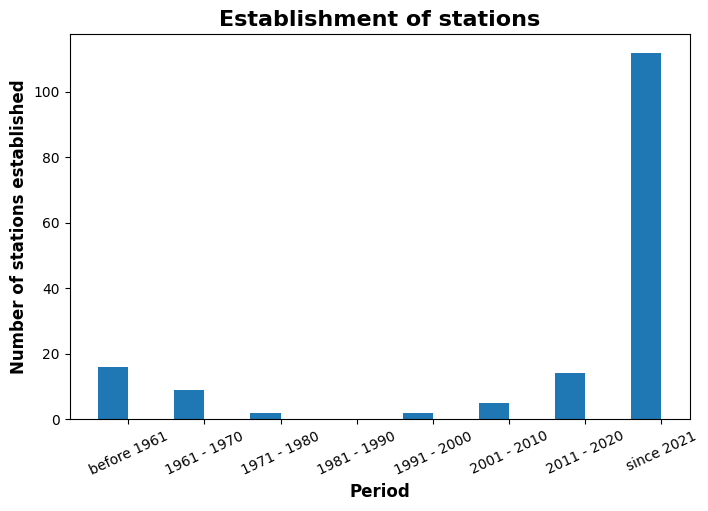

In [9]:
## Barplot over the decades showing how many stations were established & today's reporting status ##

json_file = os.getcwd()+'/stations.json'

# including today's reporting status
barplot_establishment_decade(json_file=json_file, reporting=True)
# without today's reporting status
barplot_establishment_decade(json_file=json_file, reporting=False)

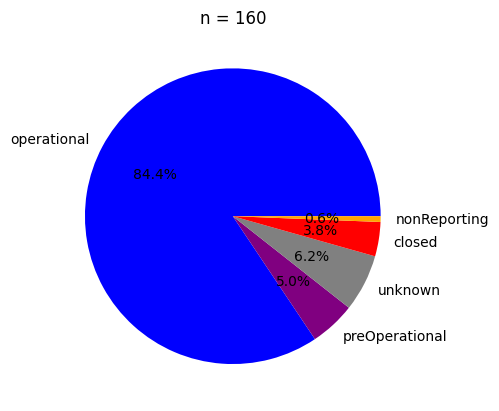

In [10]:
## Pie chart with the number of stations for each reporting status ##

json_file = os.getcwd()+'/stations.json'
piechart_reporting(json_file=json_file)

/home/sdanioth/Documents/git/OSCAR_analysis/create_plots.py:316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["observedProperties_unique"][i] = unique_codes
/home/sdanioth/Documents/git/OSCAR_analysis/create_plots.py:316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["observedProperties_unique"][i] = unique_codes
/home/sdanioth/Documents/git/OSCAR_analysis/create_plots.py:316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ob

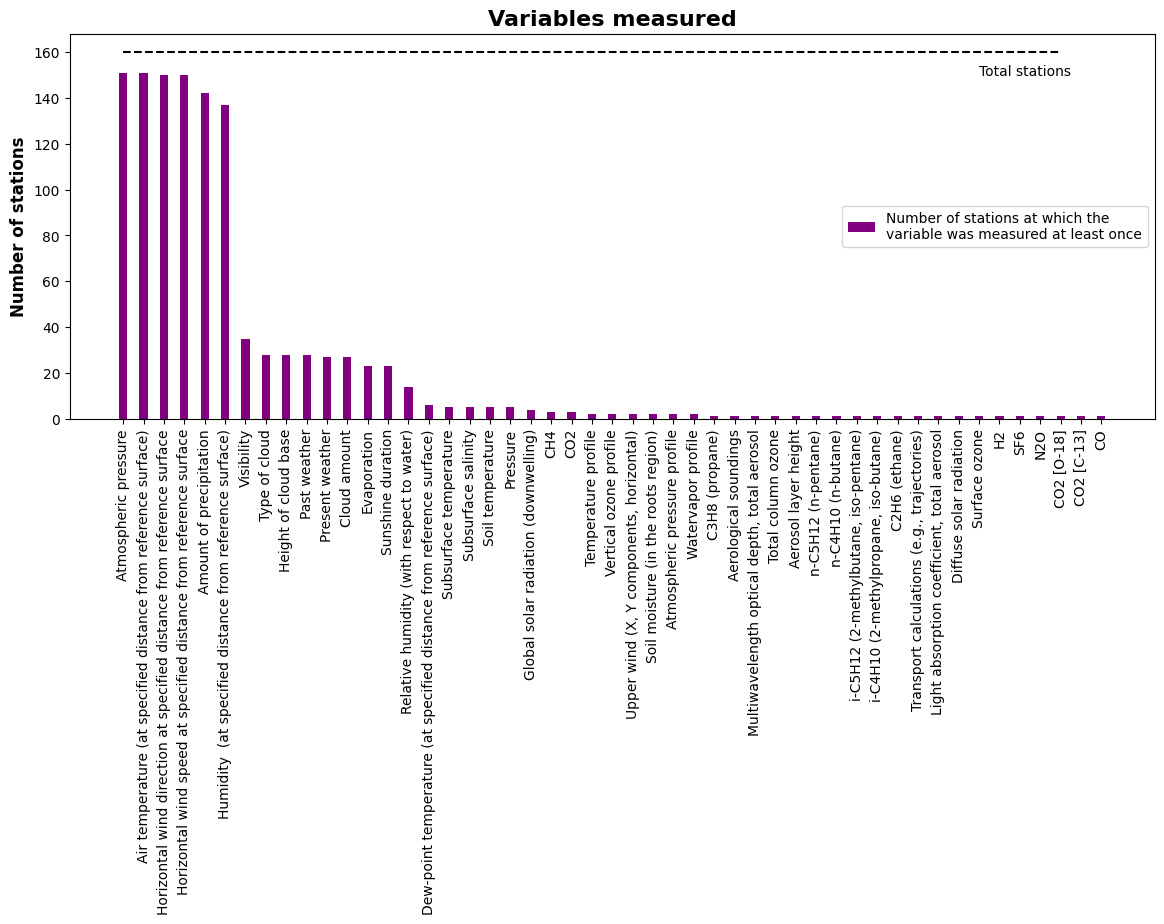

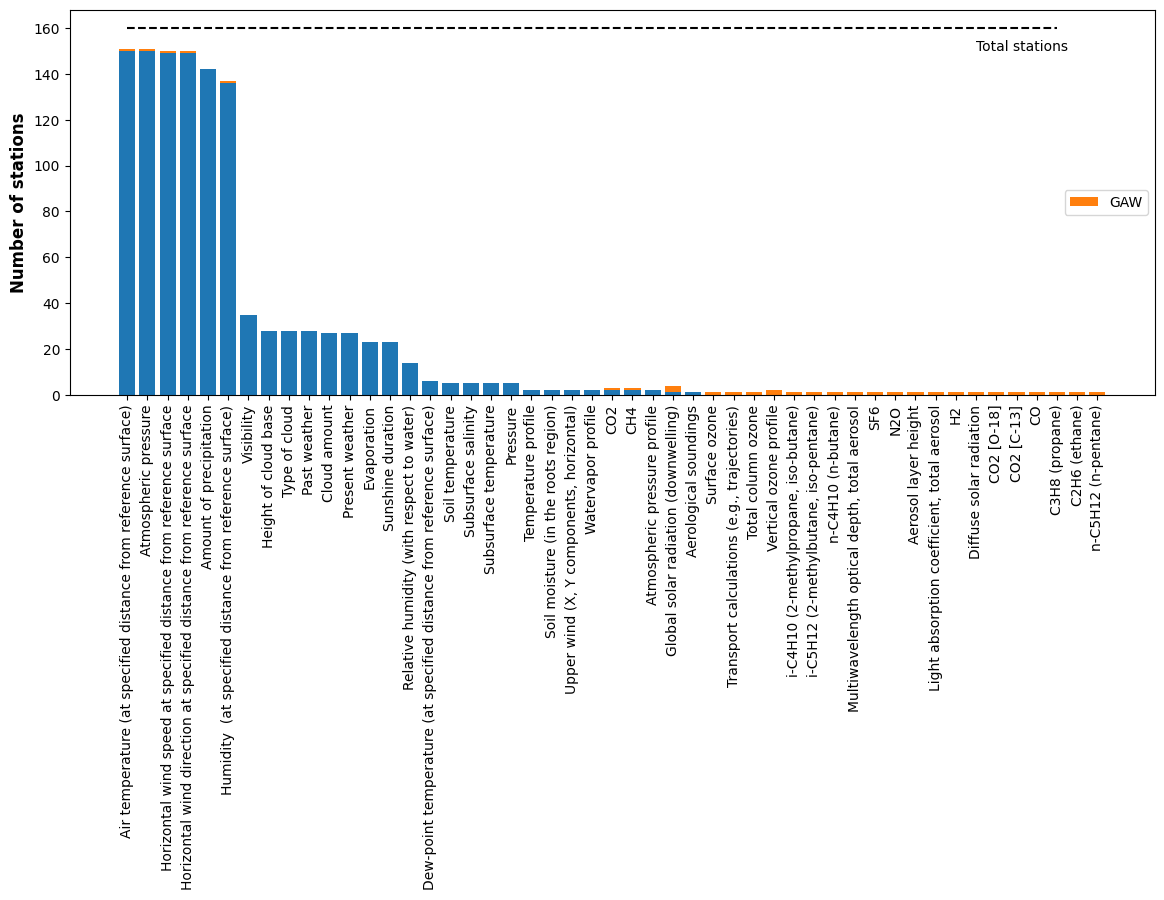

In [11]:
## Barplot of observed properties ##
# x axis: every variable measured at least once by a station in the past
# y axis: number of stations measuring the respective variable at least once in the past

json_file = os.getcwd()+'/stations.json'

barplot_observedProperties_overview(json_file=json_file)
# colors for GAW vs. other station programs
barplot_observedProperties_overview_stationProgram(json_file=json_file)

---

## Deployments of a specific station 

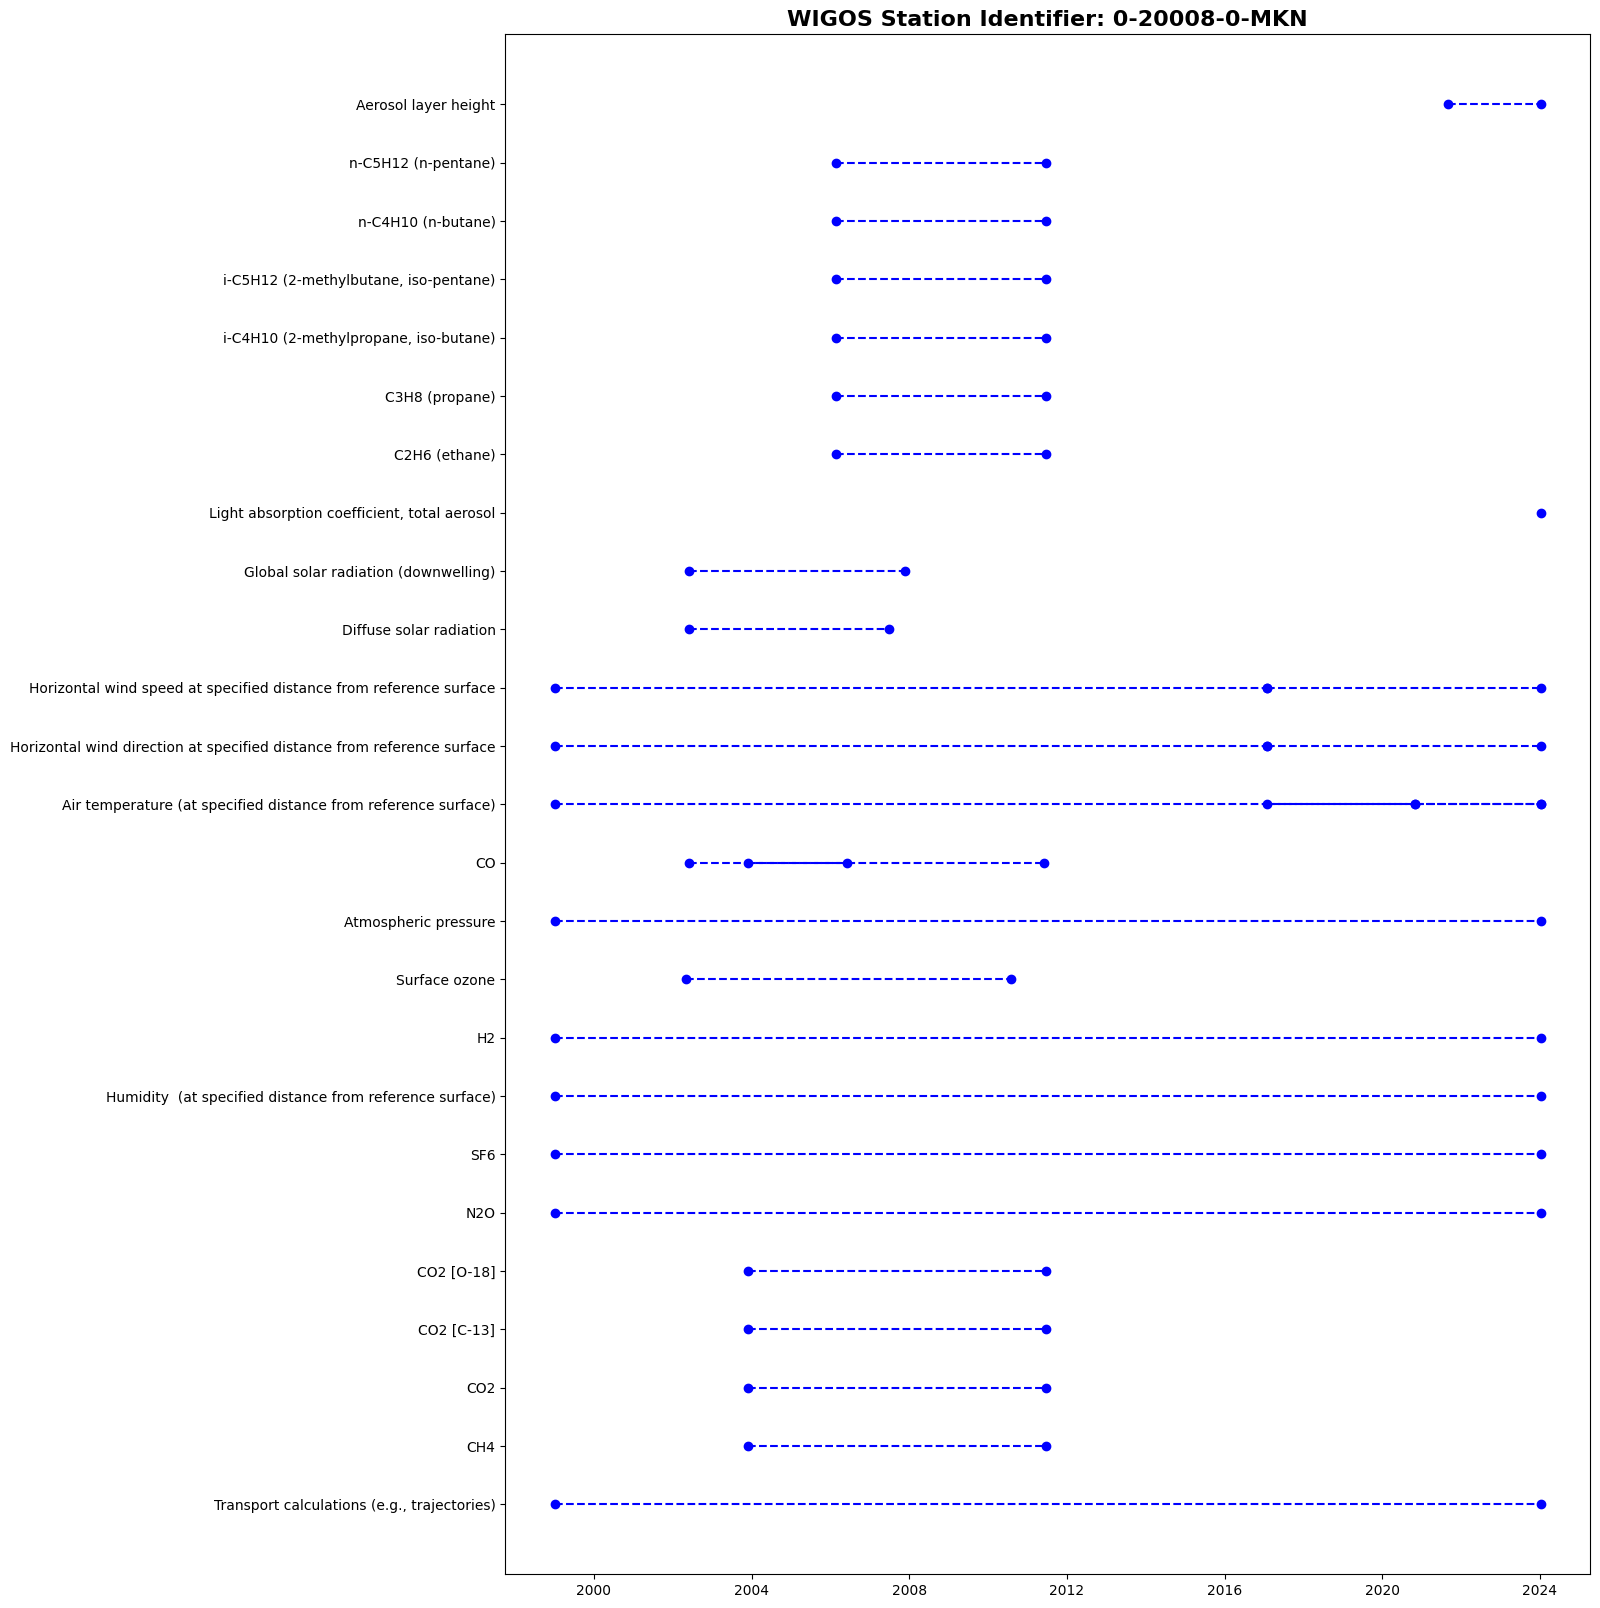

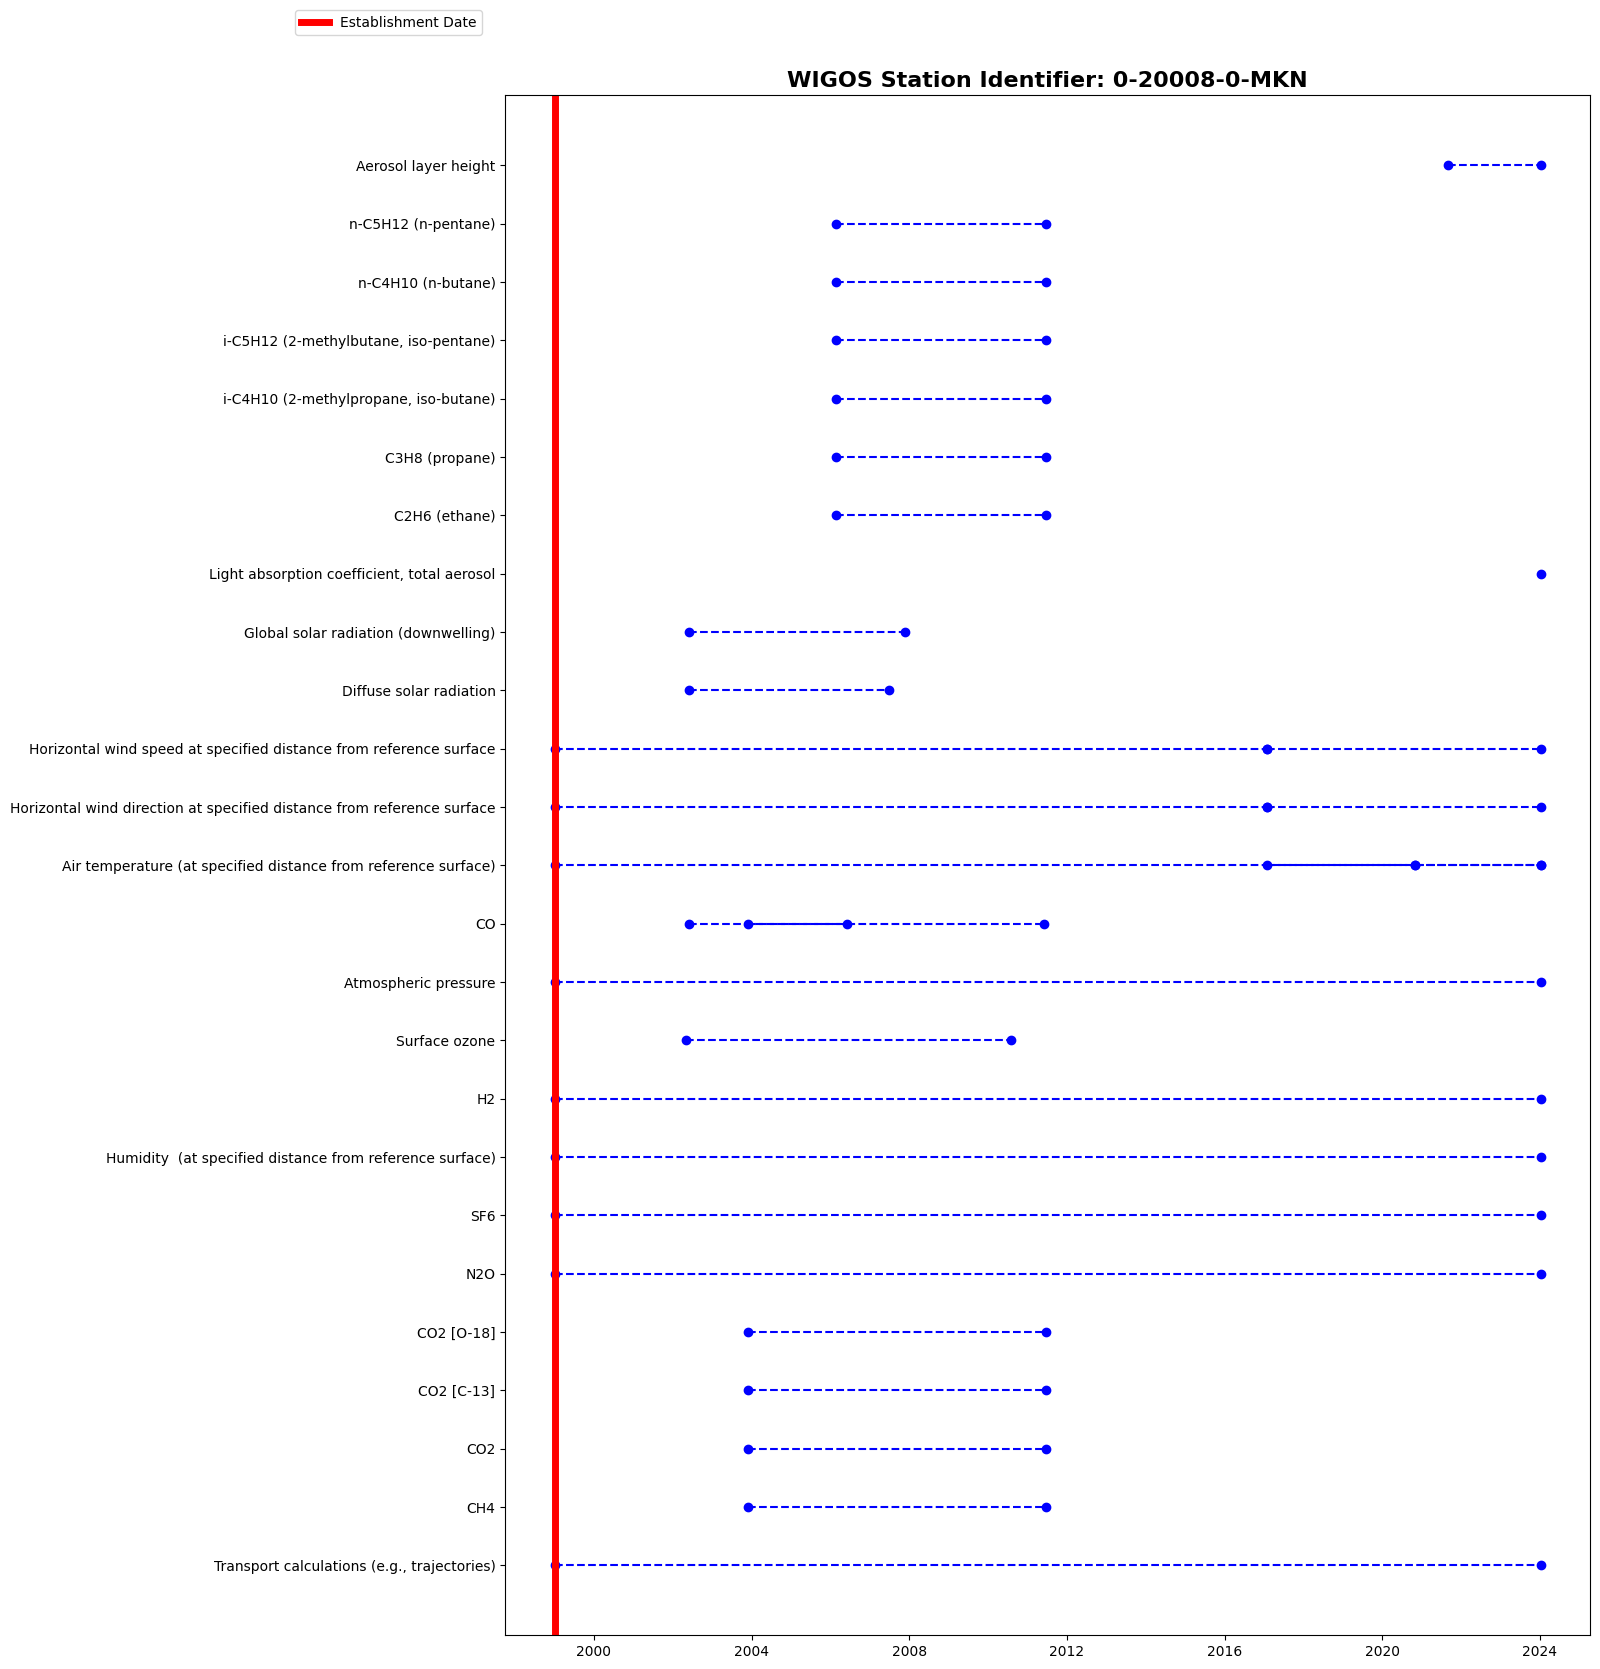

In [12]:
## All registered deployments at a station of interest ##

# choose the station (WIGOS ID)
id = '0-20008-0-MKN' # Mount Kenya as example

# without plotting establishment date
plot_deployments_station(WIGOS_ID=id, include_establishmentDate=False, show=True)
# include establishment date
plot_deployments_station(WIGOS_ID=id, include_establishmentDate=True, show=True)

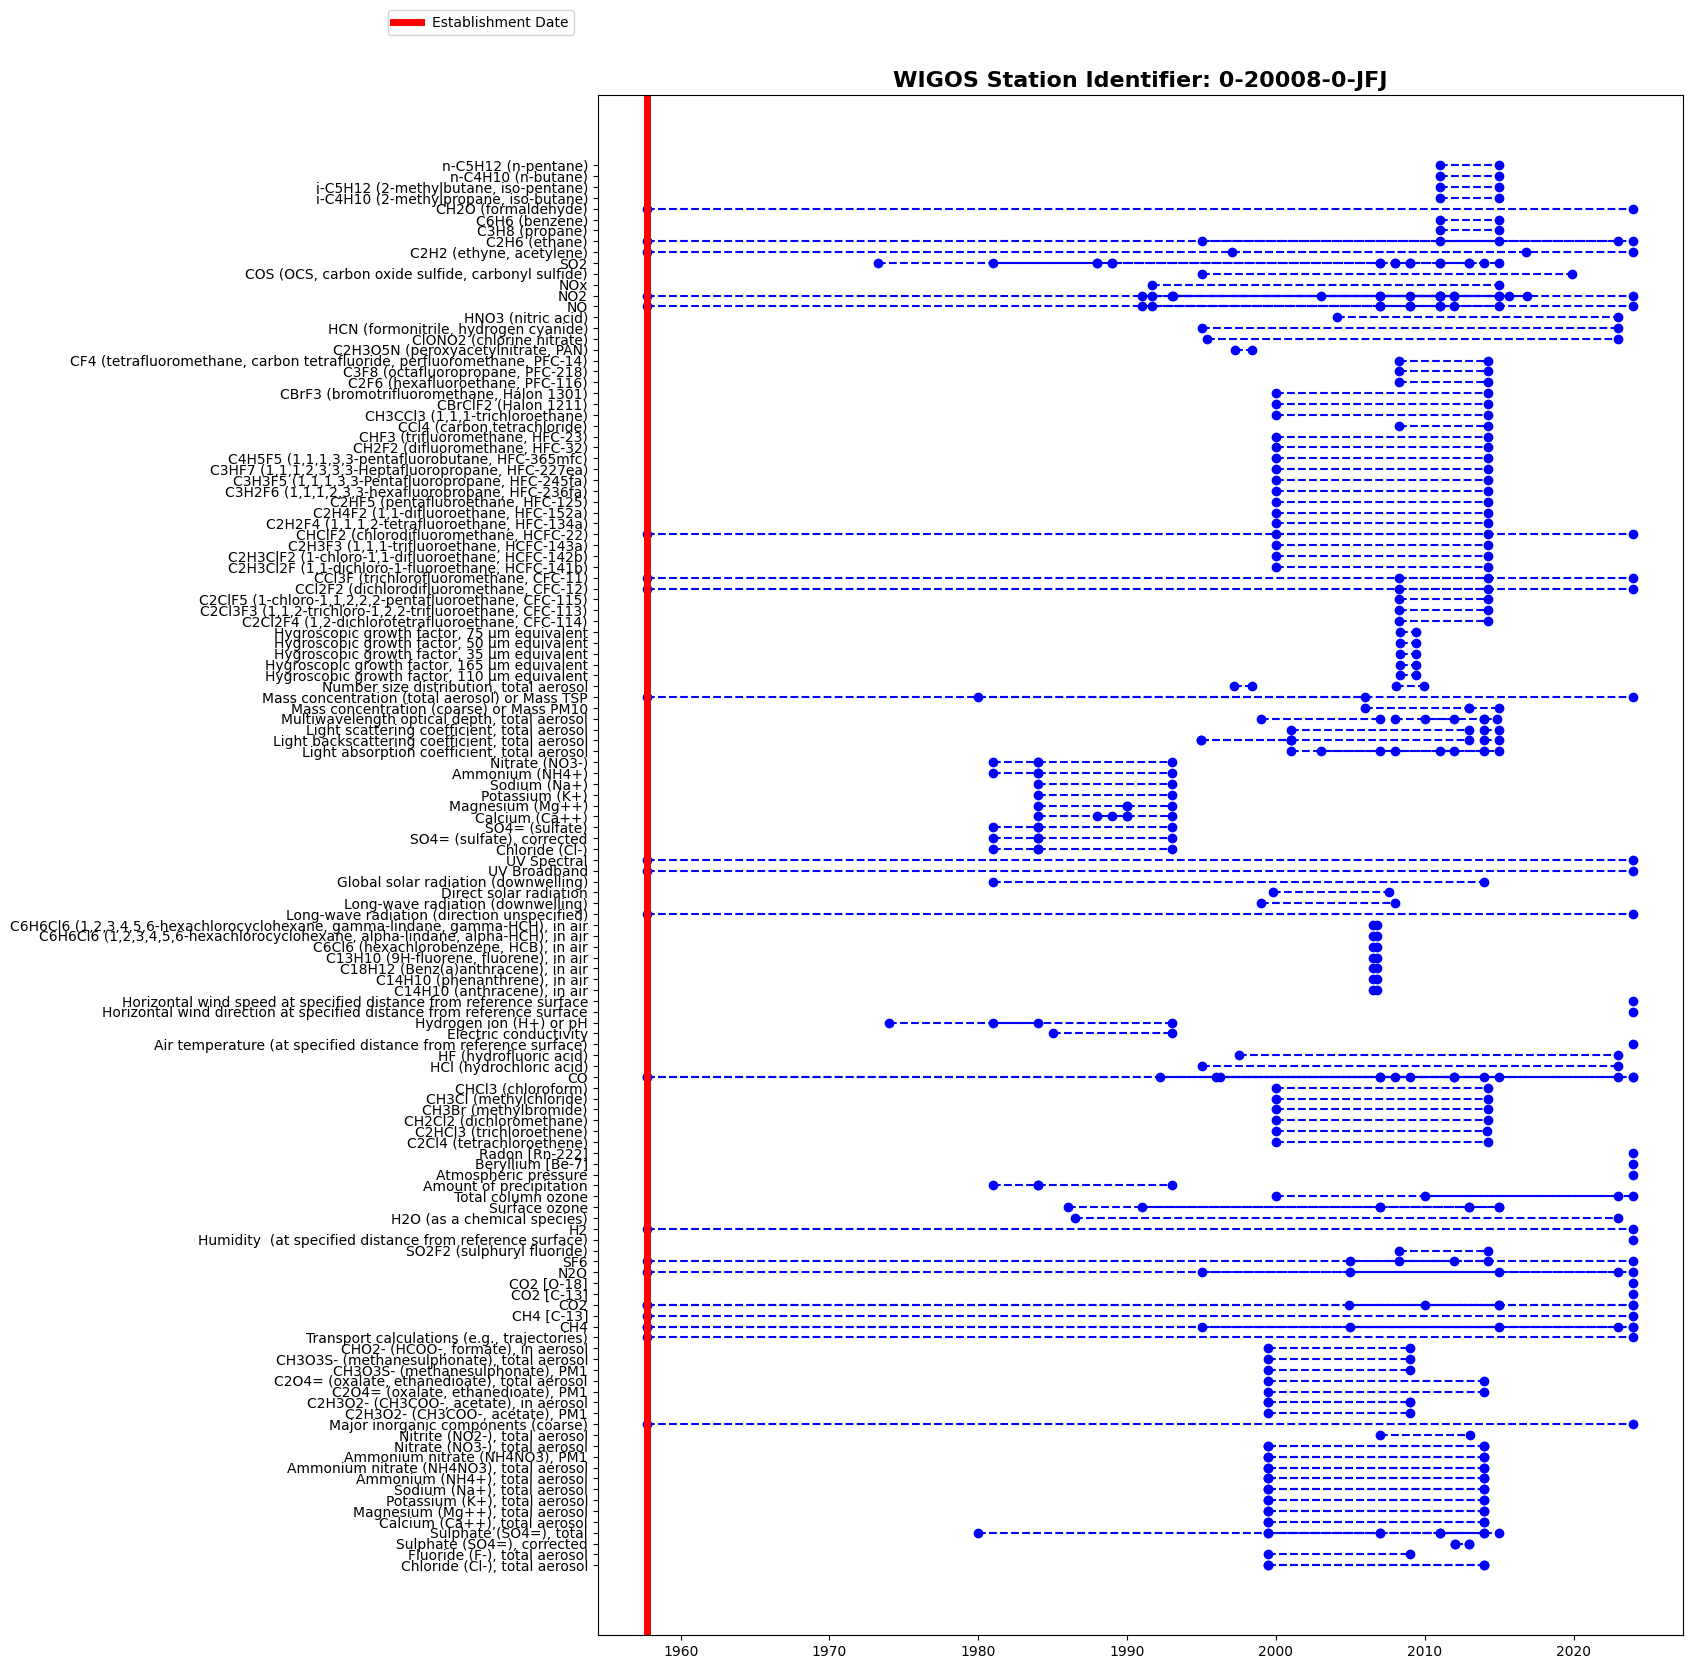

In [13]:
plot_deployments_station(WIGOS_ID="0-20008-0-JFJ", include_establishmentDate=True, show=True)

In [14]:
# do the plots for all stations within a country

# get all WIGOS IDs for stations registered within the country of interest
wigosIds = get_WIGOS_ID_country("KEN") # Kenya as an example

# plot - loop over IDs
for id in wigosIds:
    # without plotting establishment date
    plot_deployments_station(WIGOS_ID=id, include_establishmentDate=False, show=False)
    # include establishment date
    plot_deployments_station(WIGOS_ID=id, include_establishmentDate=True, show=False)

# plots are saved within the Plots folder in the "individual_stations" folder

---

## Date verification plot
* The plot shows the establishment dates of the stations and the dates of the first registered deployments of the stations. The y-axis shows all stations registered within a country, whereas the x-axis represents the time.
* The red triangles indicate the establishment date. The blue dots indicate the date of the first deployment.
* If the establishment date is after the date of the first deployment, the station label appears in red.
* If the establishment date is before the date of the first deployment but does not correspond to it, the station label appears in orange.
* If the start date of the deployment is missing, the station label appears in yellow.

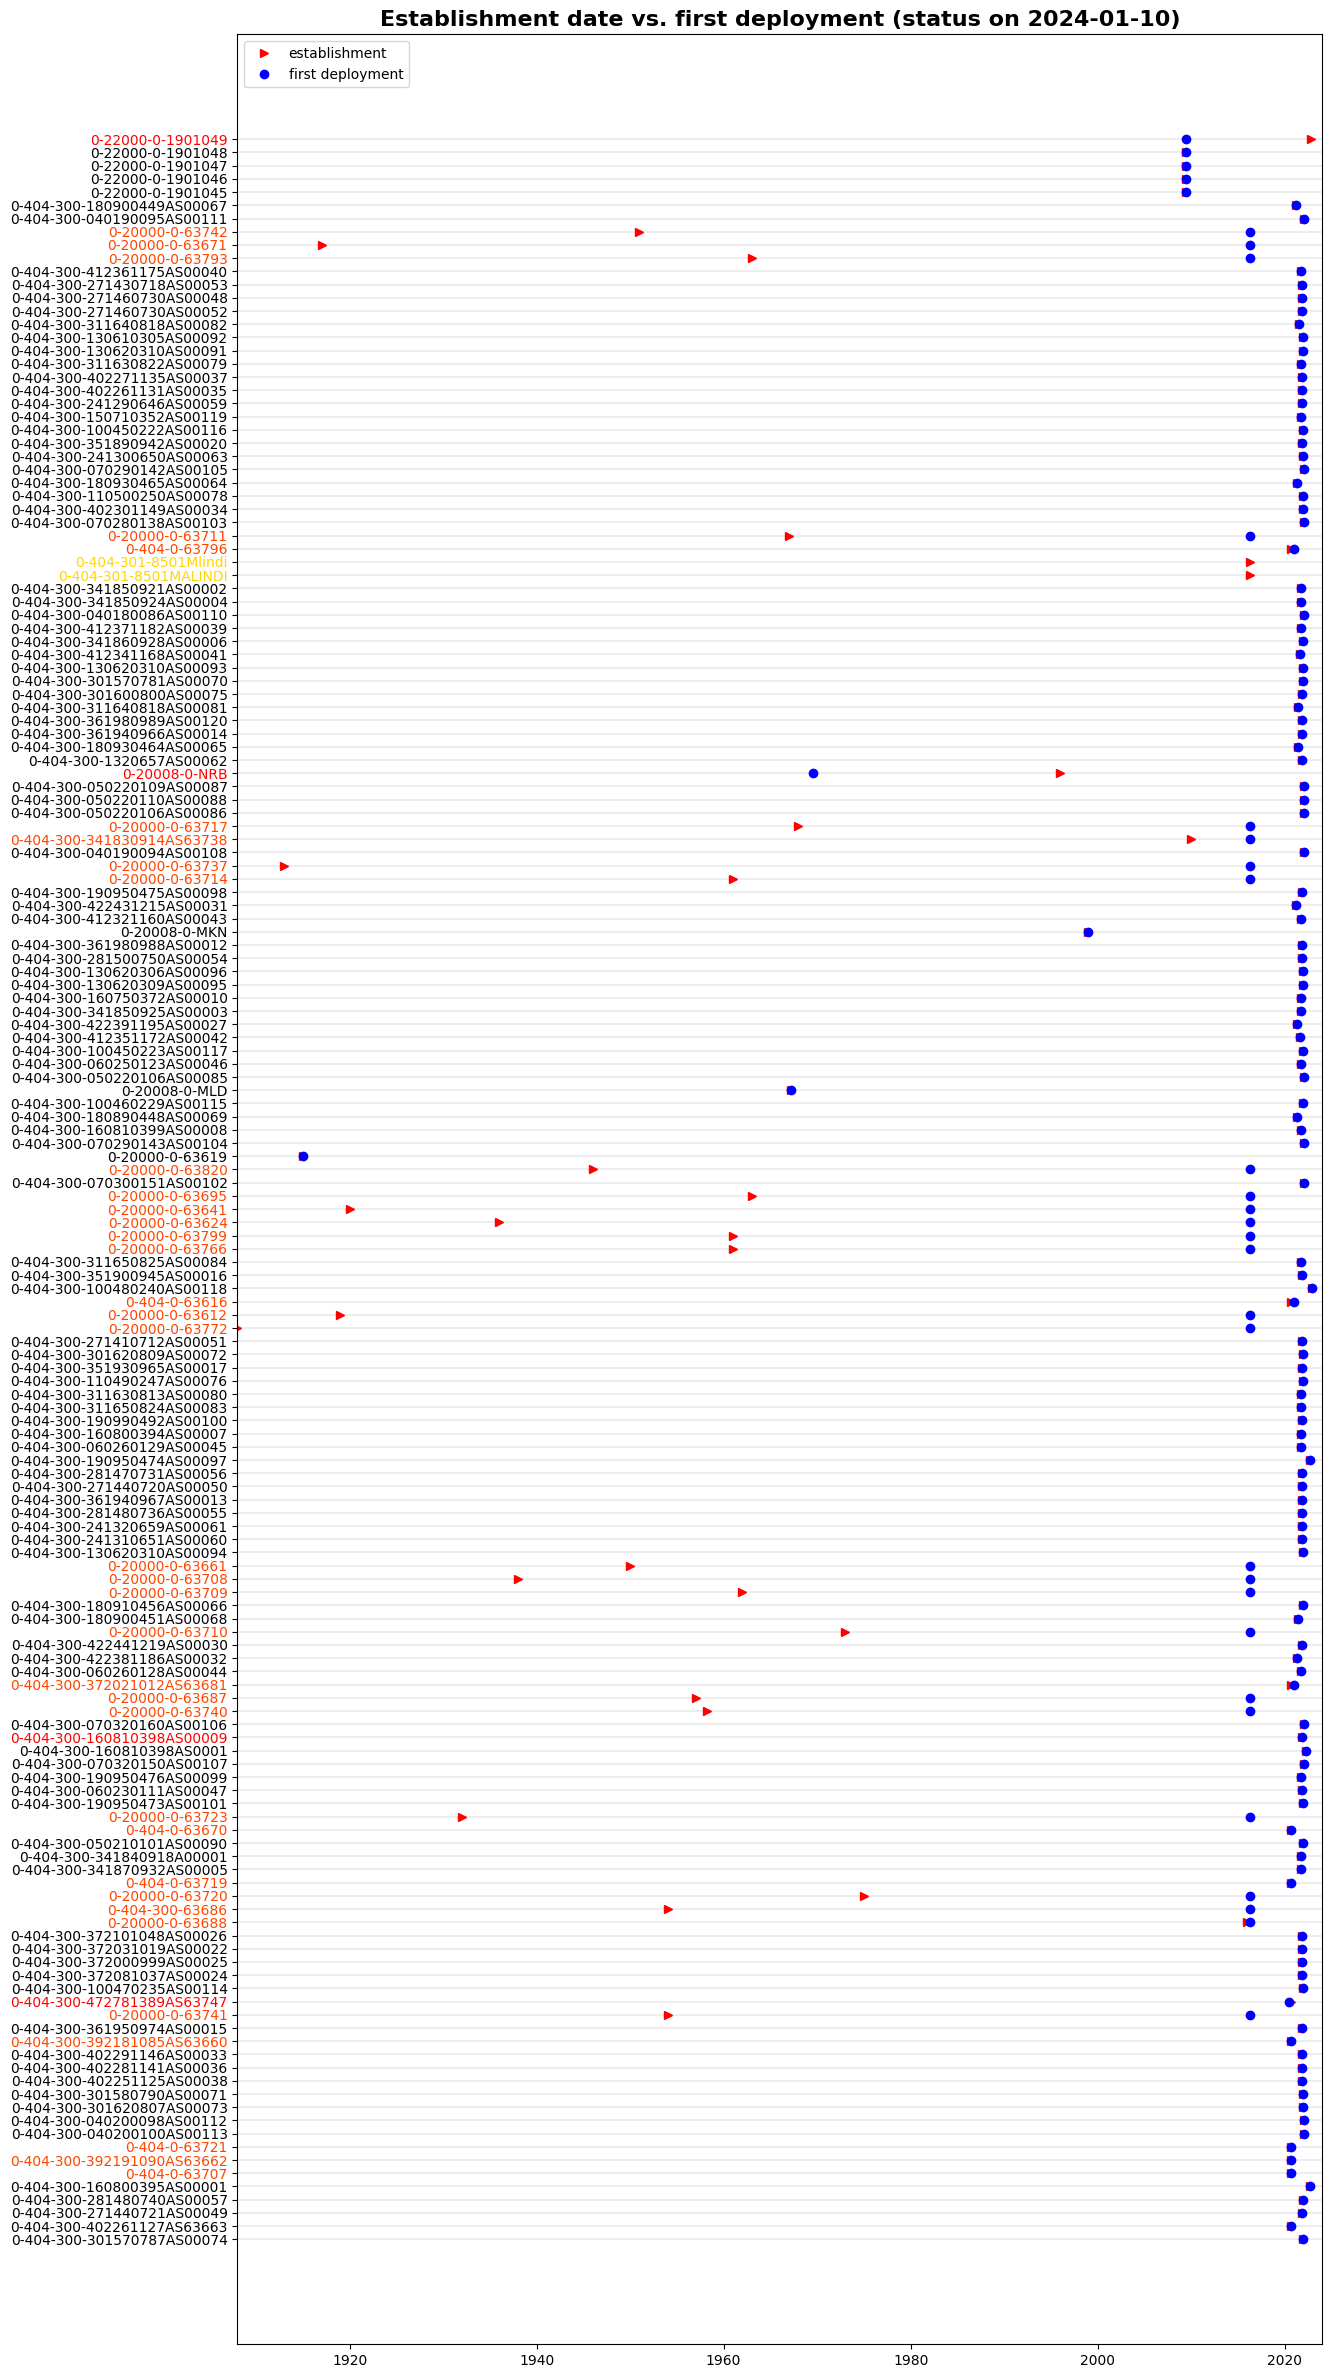

In [15]:
plt.style.use('default')
plot_date_verification(country="KEN")

---

## All deployments of a variable of interest in a country
* The y-axis shows all stations registered within a country, whereas the x-axis represents the time.
* All deployments of a variable of interest are indicated in blue. 

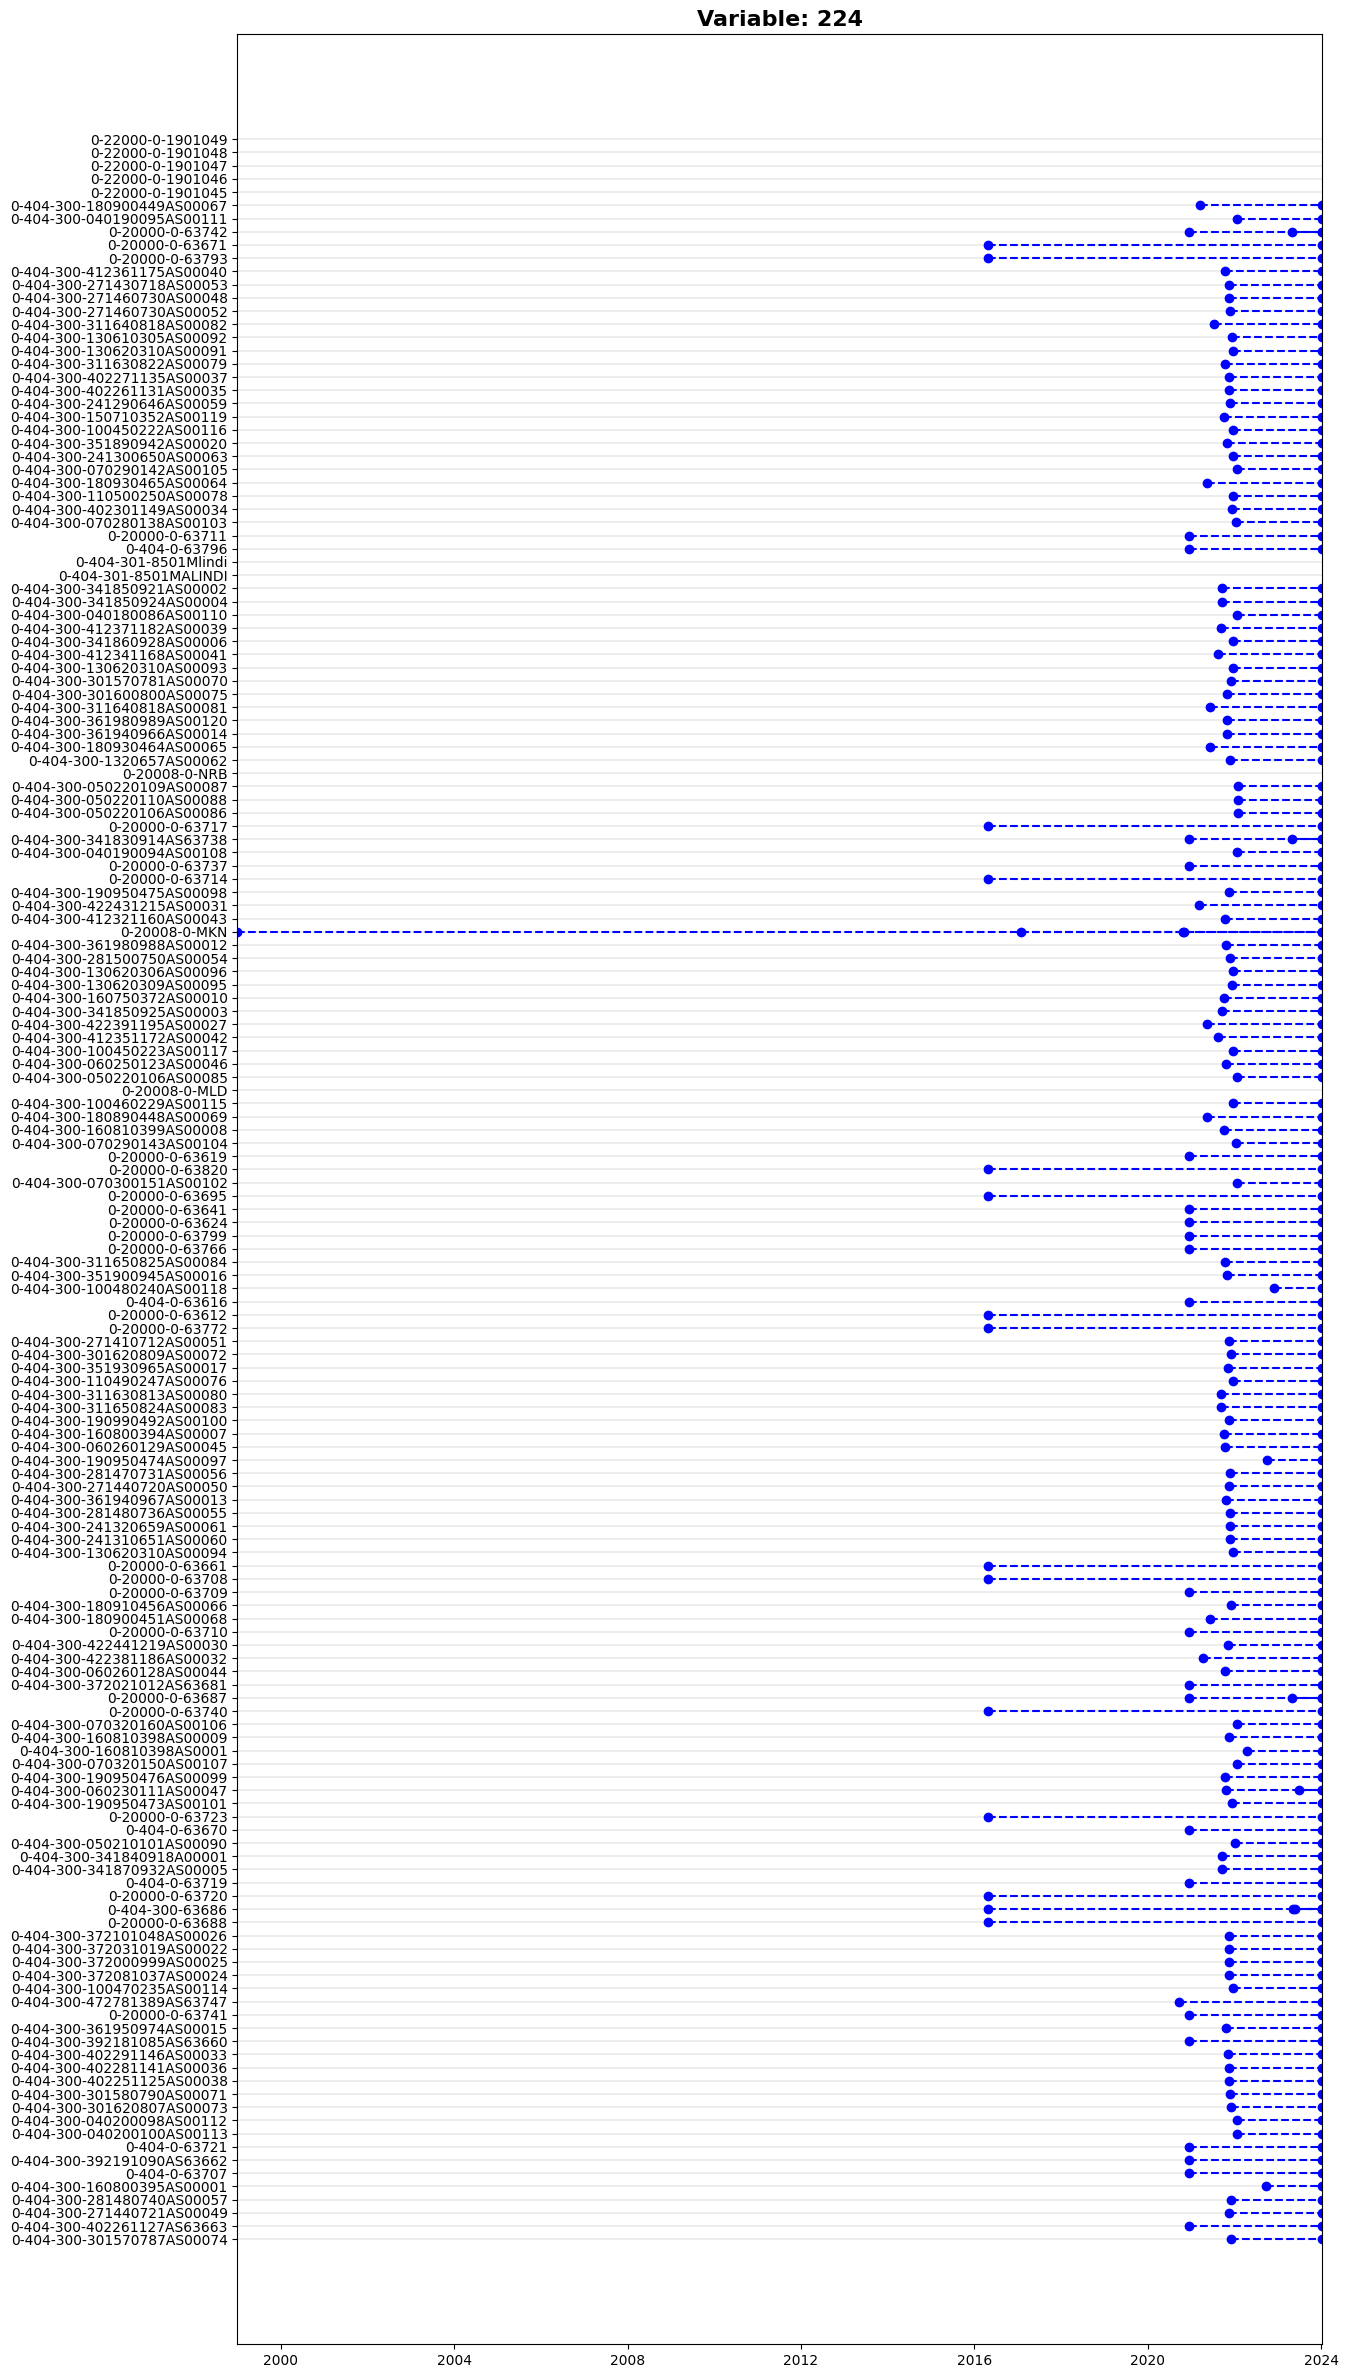

In [16]:
country = "KEN" # Kenya
variable = 224 # 224 -> Air temperature (at specified distance from reference surface) according to WMDR

plot_deployments_variable_country(country=country, variable=variable)